### The aim of this report is to analyse a dataset that compiles the characteristics of all known meteorite landings. 

In [1]:
#Importing necessary libraries

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the CSV file and exploring data

In [2]:
#Reading the comma-separated values

'''
You can get the data from-
https://www.kaggle.com/nasa/meteorite-landings
'''

df=pd.read_csv(r'C:\Users\kevin\Downloads\archive\meteorite-landings.csv')
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [3]:
df.shape

(45716, 10)

In [4]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [6]:
#Detect missing values

df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [7]:
df.describe()

#Note: These are incorrect statistical inferences because we've not yet gotten rid of null values

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [8]:
#Total valid and relict meteorites

df['nametype'].value_counts(normalize=False)

Valid     45641
Relict       75
Name: nametype, dtype: int64

In [9]:
#Total valid and relict meteorites by percentage

df['nametype'].value_counts(normalize=True)

Valid     0.998359
Relict    0.001641
Name: nametype, dtype: float64

<AxesSubplot:>

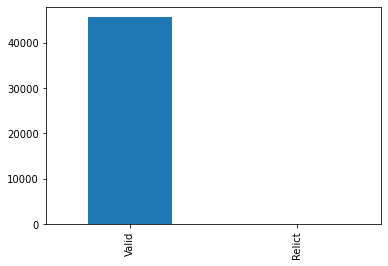

In [21]:
df['nametype'].value_counts().plot(kind='bar')

In [11]:
# % of meteorite under categories - "meteorite fall"(fall) and "meteorite find"(find)

'''
A "meteorite fall", also called an "observed fall", is a meteorite collected after its arrival 
was observed by people or automated devices. Any other meteorite is called a "meteorite find".
'''

df['fall'].value_counts(normalize=True)

Found    0.975785
Fell     0.024215
Name: fall, dtype: float64

In [25]:
df["recclass"].value_counts()

L6                 8285
H5                 7142
L5                 4796
H6                 4528
H4                 4211
                   ... 
L3.0-3.7              1
LL4/6                 1
Iron, IIIE-an         1
L4-melt breccia       1
L3.3-3.7              1
Name: recclass, Length: 466, dtype: int64

In [40]:
#Getting rid of Null values

df_new = df.dropna(subset=["reclong", "reclat","mass"])
# df_new = df.dropna(subset=["mass"])

In [41]:
df_new.isna().sum()

name             0
id               0
nametype         0
recclass         0
mass             0
fall             0
year           166
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [70]:
df_new['mass'].describe()

count    38282.000000
mean        15.580978
std        627.320291
min          0.000000
25%          0.006700
50%          0.029345
75%          0.189175
max      60000.000000
Name: mass, dtype: float64

In [71]:
df_new['year'].describe()

count    38116.000000
mean      1989.957472
std         26.444565
min        601.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: year, dtype: float64

In [42]:
print(df_new.corr())

               id      mass      year    reclat   reclong
id       1.000000 -0.017947  0.337228  0.271513 -0.334474
mass    -0.017947  1.000000 -0.117377  0.029087 -0.021860
year     0.337228 -0.117377  1.000000 -0.103759  0.087598
reclat   0.271513  0.029087 -0.103759  1.000000 -0.592508
reclong -0.334474 -0.021860  0.087598 -0.592508  1.000000


In [43]:
df_new["mass"] = df_new["mass"] / 1000
print(df_new["mass"])


0          0.0210
1          0.7200
2        107.0000
3          1.9140
4          0.7800
           ...   
45711      0.1720
45712      0.0460
45713      0.0033
45714      2.1670
45715      0.2000
Name: mass, Length: 38282, dtype: float64


<ipython-input-43-8be3704dbc19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["mass"] = df_new["mass"] / 1000


In [48]:
#Well we still can't predict future can we?

print(df_new[df_new["year"]>2021])

                        name     id nametype recclass   mass   fall    year  \
30679  Northwest Africa 7701  57150    Valid      CK6  0.055  Found  2101.0   

       reclat  reclong           GeoLocation  
30679     0.0      0.0  (0.000000, 0.000000)  


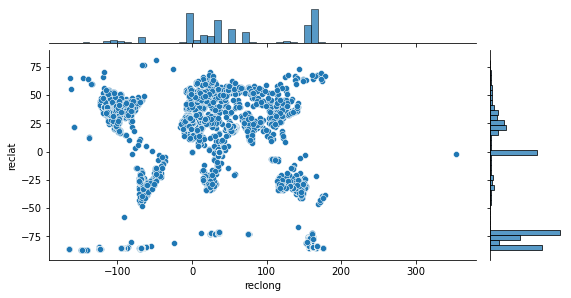

In [16]:
#Plot shows the landing area of meteorite based on latitude and longitude

pl=sns.jointplot(data=df, x="reclong", y="reclat")

#set plot size
pl.fig.set_figwidth(8.27)
pl.fig.set_figheight(4)

#Note: Through this plot we can identify one outliar which can be addressed using below line
    
df_new = df_new[df_new.reclong < 300]

In [55]:
df_new.groupby(["recclass","fall"])["mass"].mean()

recclass               fall 
Acapulcoite            Fell     1.914000
                       Found    0.257919
Acapulcoite/Lodranite  Found    0.025352
Acapulcoite/lodranite  Found    0.066750
Achondrite-prim        Found    0.747667
                                  ...   
Ureilite-an            Fell     3.950000
                       Found    0.016850
Ureilite-pmict         Found    0.306461
Winonaite              Fell     0.157000
                       Found    1.564531
Name: mass, Length: 536, dtype: float64

<AxesSubplot:>

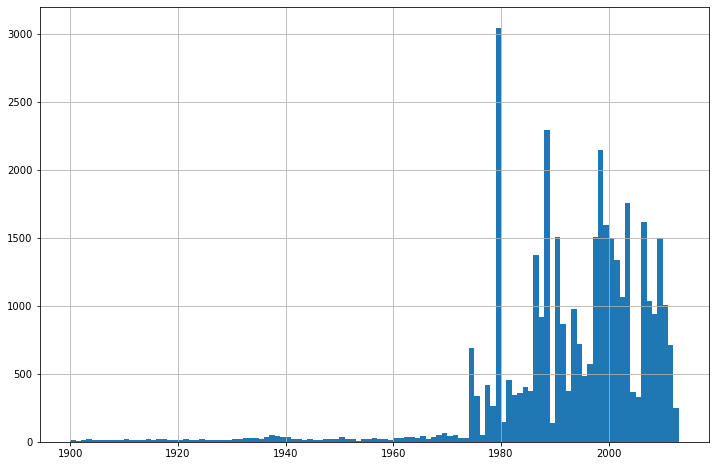

In [62]:
figure = plt.figure(figsize=(12,8))

df_new.year.hist(bins=np.arange(1900,2014,1))

<AxesSubplot:>

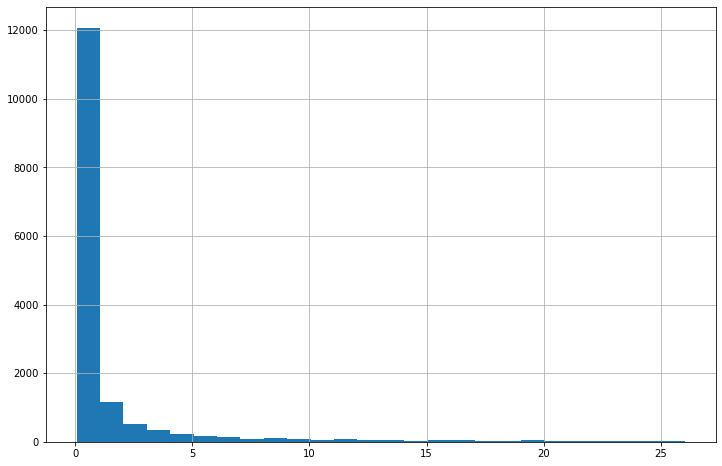

In [63]:
#Histogram of the mass of the meteorite

figure = plt.figure(figsize=(12,8))

df_new.mass.hist(bins=np.arange(0.05,27,1))

In [65]:
#Heaviest meteorite to test humanity

df.nlargest(10, ['mass'])

#check out these huge meteorite on Wikipedia
#https://en.wikipedia.org/wiki/Hoba_meteorite
#https://en.wikipedia.org/wiki/Cape_York_meteorite

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16383,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.583330, 17.916670)"
5336,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.133330, -64.933330)"
5329,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.466670, -60.583330)"
5333,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.050000, -111.033330)"
3433,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.000000, 88.000000)"
12600,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,1836.0,-25.50000,18.00000,"(-25.500000, 18.000000)"
5431,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852.0,27.00000,-105.10000,"(27.000000, -105.100000)"
26293,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,1911.0,-30.78333,127.55000,"(-30.783330, 127.550000)"
916,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947.0,46.16000,134.65333,"(46.160000, 134.653330)"
4981,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863.0,26.20000,-107.83333,"(26.200000, -107.833330)"
